Mentoring has been identified as an essential component in the development academic and profisional. 
The purpose is the better understanding of the mentoring experiences of graduate students enrolled at college. 

In this Notebook, used data analysis to provide personalized student mentoring, recommendations based on their profile.
The dataset used in this exercise is based https://github.com/maratonadev-br/desafio-2-2020/tree/master/Assets/Data.

In [57]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


Features :
Student enrollment
Name 
Number of  students that flunked  in the Business Law Exam
Number of  students that flunked in the Entrepreneurship Exam
Number of  students that flunked in the Financial Mathematics Exam
Number of students that flunked in the  Operational Management Exam
Grade point average of students in the Business Law Exam
Grade point average of students in the Entrepreneurship Exam
Grade point average of students in the Financial Mathematics Exam
Grade point average of students in the Operational Management Exam
English - Binary variable  that indicates If the student has  knowledge of the English Language (No==0 or Yes==1)
Study time attendance completed by students
Number of tasks handed online submission by students
Number of students absent

Target Variable Categorical:
Profile 
Excellent
Very Good
Human
Exact
Difficulty

In [58]:
df = pd.read_csv('data/dataset.csv')

# Exploratory Data Analysis 

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MATRICULA       20000 non-null  int64  
 1   NOME            20000 non-null  object 
 2   REPROVACOES_DE  20000 non-null  int64  
 3   REPROVACOES_EM  20000 non-null  int64  
 4   REPROVACOES_MF  20000 non-null  int64  
 5   REPROVACOES_GO  20000 non-null  int64  
 6   NOTA_DE         20000 non-null  float64
 7   NOTA_EM         20000 non-null  float64
 8   NOTA_MF         20000 non-null  float64
 9   NOTA_GO         16284 non-null  float64
 10  INGLES          16372 non-null  float64
 11  H_AULA_PRES     20000 non-null  int64  
 12  TAREFAS_ONLINE  20000 non-null  int64  
 13  FALTAS          20000 non-null  int64  
 14  PERFIL          20000 non-null  object 
dtypes: float64(5), int64(8), object(2)
memory usage: 2.3+ MB


In [60]:
df.loc[:,['REPROVACOES_DE','REPROVACOES_EM','REPROVACOES_MF','REPROVACOES_GO',
         'NOTA_DE','NOTA_EM','NOTA_MF','NOTA_GO','H_AULA_PRES', 'TAREFAS_ONLINE', 
         'FALTAS']].describe()

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,H_AULA_PRES,TAREFAS_ONLINE,FALTAS
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,16284.000000,20000.000000,20000.000000,20000.000000
mean,0.242850,0.242850,0.297650,0.293350,5.196560,5.080285,4.817630,4.534101,5.102950,3.140300,4.060600
std,0.615055,0.615055,0.672813,0.661829,2.522545,2.523928,2.734775,2.509209,4.118422,1.854909,1.674714
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,5.200000,4.900000,4.700000,4.500000,2.000000,2.000000,3.000000
50%,0.000000,0.000000,0.000000,0.000000,6.200000,5.900000,5.500000,5.400000,4.000000,3.000000,4.000000
75%,0.000000,0.000000,0.000000,0.000000,6.700000,6.700000,6.500000,6.200000,6.000000,5.000000,6.000000
max,3.000000,3.000000,3.000000,3.000000,9.000000,9.400000,11.500000,10.000000,25.000000,7.000000,8.000000


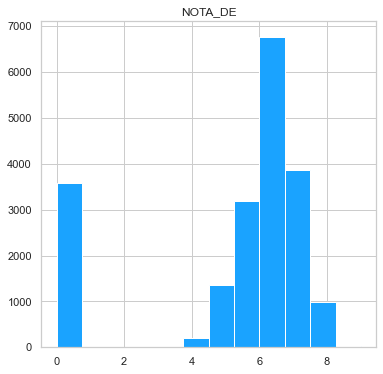

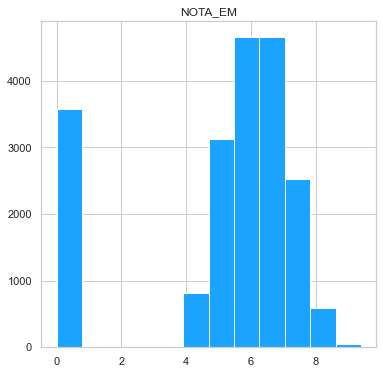

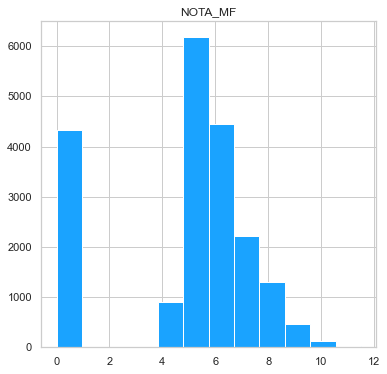

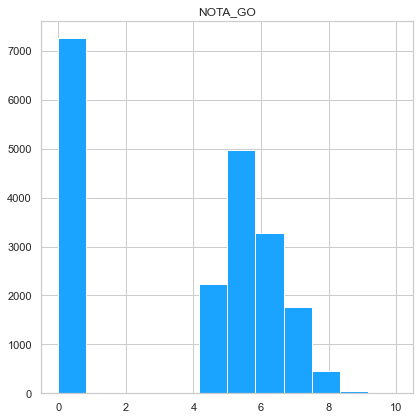

In [85]:
#Create histogram for each Profile
inputs = ['NOTA_DE','NOTA_EM','NOTA_MF','NOTA_GO']
for col in inputs:
        df.hist(column=col, bins=12, figsize=(6,6),color='#1aa3ff')
        plt.title(col)
plt.tight_layout()
plt.show()

Handling missing values

In [62]:
#Checking missing values
df.isnull().sum()

MATRICULA            0
NOME                 0
REPROVACOES_DE       0
REPROVACOES_EM       0
REPROVACOES_MF       0
REPROVACOES_GO       0
NOTA_DE              0
NOTA_EM              0
NOTA_MF              0
NOTA_GO           3716
INGLES            3628
H_AULA_PRES          0
TAREFAS_ONLINE       0
FALTAS               0
PERFIL               0
dtype: int64

In [63]:
#Replacing missing values
df.fillna(0,inplace=True)

In [64]:
df.shape

(20000, 15)

In [65]:
df.duplicated().sum()

0

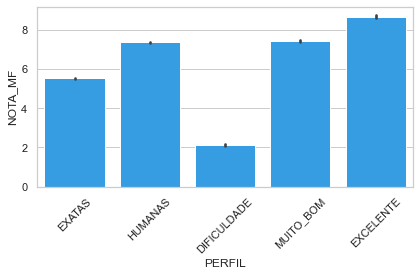

In [66]:
sns.set_theme(style="whitegrid")
sns.barplot(x='PERFIL', y='NOTA_MF', data=df, color='#1aa3ff')
plt.xlabel('PERFIL')
plt.ylabel('NOTA_MF')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [67]:
df2 = df.rank()

Text(0.5, 1.0, 'Correlation Heatmap')

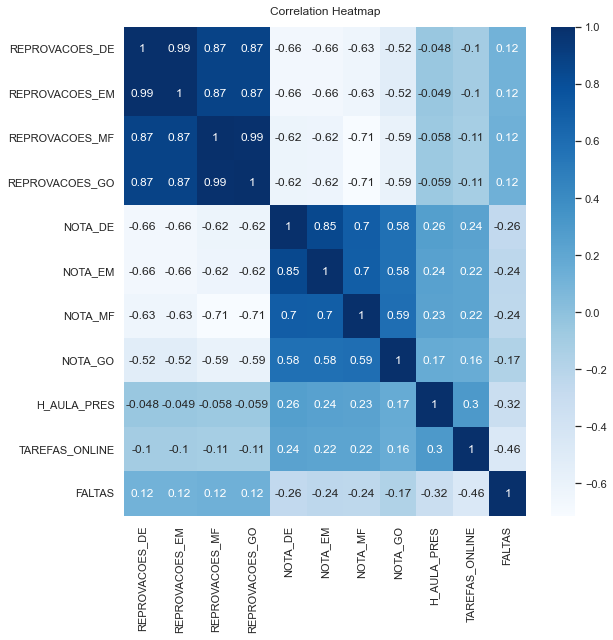

In [68]:
plt.figure(figsize=(9, 9))
sns.heatmap(df2.loc[:,['REPROVACOES_DE','REPROVACOES_EM','REPROVACOES_MF','REPROVACOES_GO',
                         'NOTA_DE','NOTA_EM','NOTA_MF','NOTA_GO','H_AULA_PRES', 'TAREFAS_ONLINE', 
                         'FALTAS']].corr('spearman'), annot=True, cmap='Blues')
plt.title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [69]:
df['PERFIL'].unique()

array(['EXATAS', 'HUMANAS', 'DIFICULDADE', 'MUITO_BOM', 'EXCELENTE'],
      dtype=object)

In [70]:
df['PERFIL'].value_counts(ascending=True)

EXCELENTE       671
MUITO_BOM       902
HUMANAS        3196
DIFICULDADE    7001
EXATAS         8230
Name: PERFIL, dtype: int64

Target Transformation

In [86]:
labelencoder = LabelEncoder()
df['PERFIL'] = labelencoder.fit_transform(df['PERFIL'])

In [87]:
#Define X and Y
features  = ['REPROVACOES_DE','REPROVACOES_EM','REPROVACOES_MF','REPROVACOES_GO',
            'NOTA_DE','NOTA_EM','NOTA_MF','NOTA_GO','H_AULA_PRES', 'TAREFAS_ONLINE', 'FALTAS']
X = df[features]
y = df.PERFIL

In [88]:
X.head()

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,H_AULA_PRES,TAREFAS_ONLINE,FALTAS
0,0,0,0,0,6.2,5.8,4.6,5.9,2,4,3
1,0,0,0,0,6.0,6.2,5.2,4.5,2,4,3
2,0,0,0,0,7.3,6.7,7.1,7.2,5,0,3
3,1,3,1,1,0.0,0.0,0.0,0.0,4,4,4
4,1,3,1,1,0.0,0.0,0.0,0.0,5,2,5


In [89]:
sm = SMOTE(sampling_strategy='minority',random_state=42)

In [90]:
X, y = sm.fit_resample(X, y)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42, stratify=y)

In [92]:
X_train.shape

(22047, 11)

In [93]:
X_test.shape

(5512, 11)

In [94]:
model1 = xgb.XGBClassifier(max_depth=10, n_estimators=50, use_label_encoder=False,num_class=5, learning_rate=0.04,reg_alpha=0,reg_lambda=1,eval_metric ='merror',  
                              booster='gbtree',objective='multi:softprob')

model1.fit(X_train,y_train, 
          verbose=True,
          early_stopping_rounds=10,
          eval_set=[(X_test,y_test)])
print(model1)

[0]	validation_0-merror:0.14822
[1]	validation_0-merror:0.14586
[2]	validation_0-merror:0.14786
[3]	validation_0-merror:0.14750
[4]	validation_0-merror:0.14605
[5]	validation_0-merror:0.14459
[6]	validation_0-merror:0.14532
[7]	validation_0-merror:0.14350
[8]	validation_0-merror:0.14278
[9]	validation_0-merror:0.14278
[10]	validation_0-merror:0.14260
[11]	validation_0-merror:0.14187
[12]	validation_0-merror:0.14133
[13]	validation_0-merror:0.14133
[14]	validation_0-merror:0.14024
[15]	validation_0-merror:0.14097
[16]	validation_0-merror:0.14042
[17]	validation_0-merror:0.14078
[18]	validation_0-merror:0.14115
[19]	validation_0-merror:0.14115
[20]	validation_0-merror:0.14115
[21]	validation_0-merror:0.14042
[22]	validation_0-merror:0.14115
[23]	validation_0-merror:0.14006
[24]	validation_0-merror:0.13988
[25]	validation_0-merror:0.13915
[26]	validation_0-merror:0.13970
[27]	validation_0-merror:0.13988
[28]	validation_0-merror:0.14006
[29]	validation_0-merror:0.13970
[30]	validation_0-me

In [95]:
score = model1.score(X_train,y_train)
print(score)

0.8981267292602169


In [96]:
y_pred = model1.predict(X_test)
print('Preditions : \n',y_pred[0:10])

Preditions : 
 [1 3 0 1 2 0 3 2 1 1]


In [97]:
print('True Labels:\n', y_test[0:10])

True Labels:
 17570    1
1098     3
12617    0
15030    1
25246    2
18401    0
6206     3
23696    2
16959    1
11835    1
Name: PERFIL, dtype: int32


In [98]:
# Get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1400
           1       0.80      0.92      0.86      1646
           2       0.93      0.98      0.95      1646
           3       0.81      0.87      0.84       639
           4       0.23      0.03      0.06       181

    accuracy                           0.86      5512
   macro avg       0.73      0.71      0.70      5512
weighted avg       0.85      0.86      0.85      5512



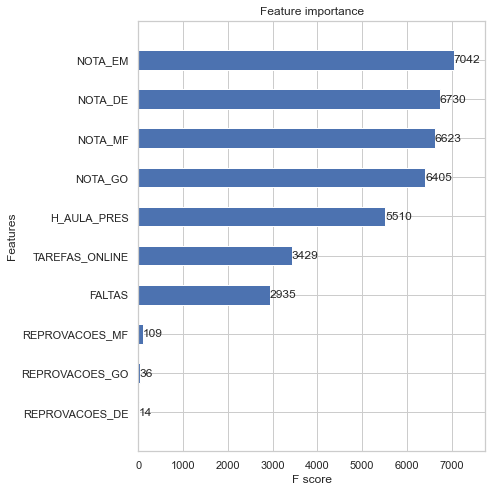

In [99]:
plt.rcParams['figure.figsize'] = (7, 7)
xgb.plot_importance(model1, height=0.5)
plt.tight_layout()
plt.show()

In [100]:
dtrain = xgb.DMatrix(X_train, label=y_train)

In [101]:
params = {'max_depth':20, 'eta': 1, 'objective': 'multi:softprob', 'eval_metric':['merror'], 'num_class':5, 'learning_rate':0.03,
         'reg_alpha':0, 'reg_lambda':1}

In [102]:
cov_res=xgb.cv(params, nfold=10, dtrain=dtrain)

In [103]:
cov_res.head()

,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
0,0.093306,0.001701,0.157028,0.004145
1,0.088629,0.001293,0.155939,0.005458
2,0.085464,0.001017,0.154624,0.004095
3,0.083075,0.001249,0.153716,0.002981
4,0.081059,0.001145,0.153172,0.002988


In [104]:
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

In [105]:
results = cross_val_score(model1, X, y, cv=kfold)

In [106]:
param_grid = { 
    'eta':[0.5,1],
    'colsample_bytree':[0.5,1],
    'learning_rate':[0.2,0.3],
    'max_depth':[50],
    'subsample':[0.5,1],
    'n_estimators': [20]
}

In [107]:
model_Grid = GridSearchCV(estimator = model1,param_grid = param_grid)
model_Grid.fit(X_train,y_train)
print(model_Grid.best_params_)

{'colsample_bytree': 0.5, 'eta': 0.5, 'learning_rate': 0.2, 'max_depth': 50, 'n_estimators': 20, 'subsample': 1}


In [108]:
model2 = xgb.XGBClassifier(booster='gbtree', 
                            max_depth=20,
                            eta=0.5,
                            subsample=1, 
                            n_estimators=50, 
                            use_label_encoder=False,
                            num_class=5, 
                            learning_rate=0.2,
                            eval_metric ='merror',
                            objective='multi:softprob', 
                            colsample_bytree=0.5)

In [109]:
model2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.5,
              eval_metric='merror', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=20, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4, num_class=5,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [110]:
predict = model2.predict(X_test)

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1400
           1       0.80      0.92      0.86      1646
           2       0.93      0.98      0.95      1646
           3       0.81      0.87      0.84       639
           4       0.23      0.03      0.06       181

    accuracy                           0.86      5512
   macro avg       0.73      0.71      0.70      5512
weighted avg       0.85      0.86      0.85      5512

